In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import explore as explore

import env
import wrangle

In [2]:
# split data into train, validate and test data
train, validate, test = wrangle.wrangle_zillow()

# get shape of train, validate, test
train.shape, validate.shape, test.shape

((901586, 7), (386395, 7), (321996, 7))

In [3]:
# create a list with discrete vairables
discrete_cols = ['bedrooms', 'bathrooms', 'year_built', 'fips']

# create a list with continuous variables
continuous_cols = ['sqft', 'tax_value', 'taxamount']

#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
def plot_variable_pairs(df):
    '''takes a datafreame and plot graph of pairplots '''
    
    # make a pairplot graph
    sns.pairplot(data=df.sample(10000),diag_kind='kde', kind='reg',corner = True, plot_kws={'line_kws':{'color':'red'}})
    

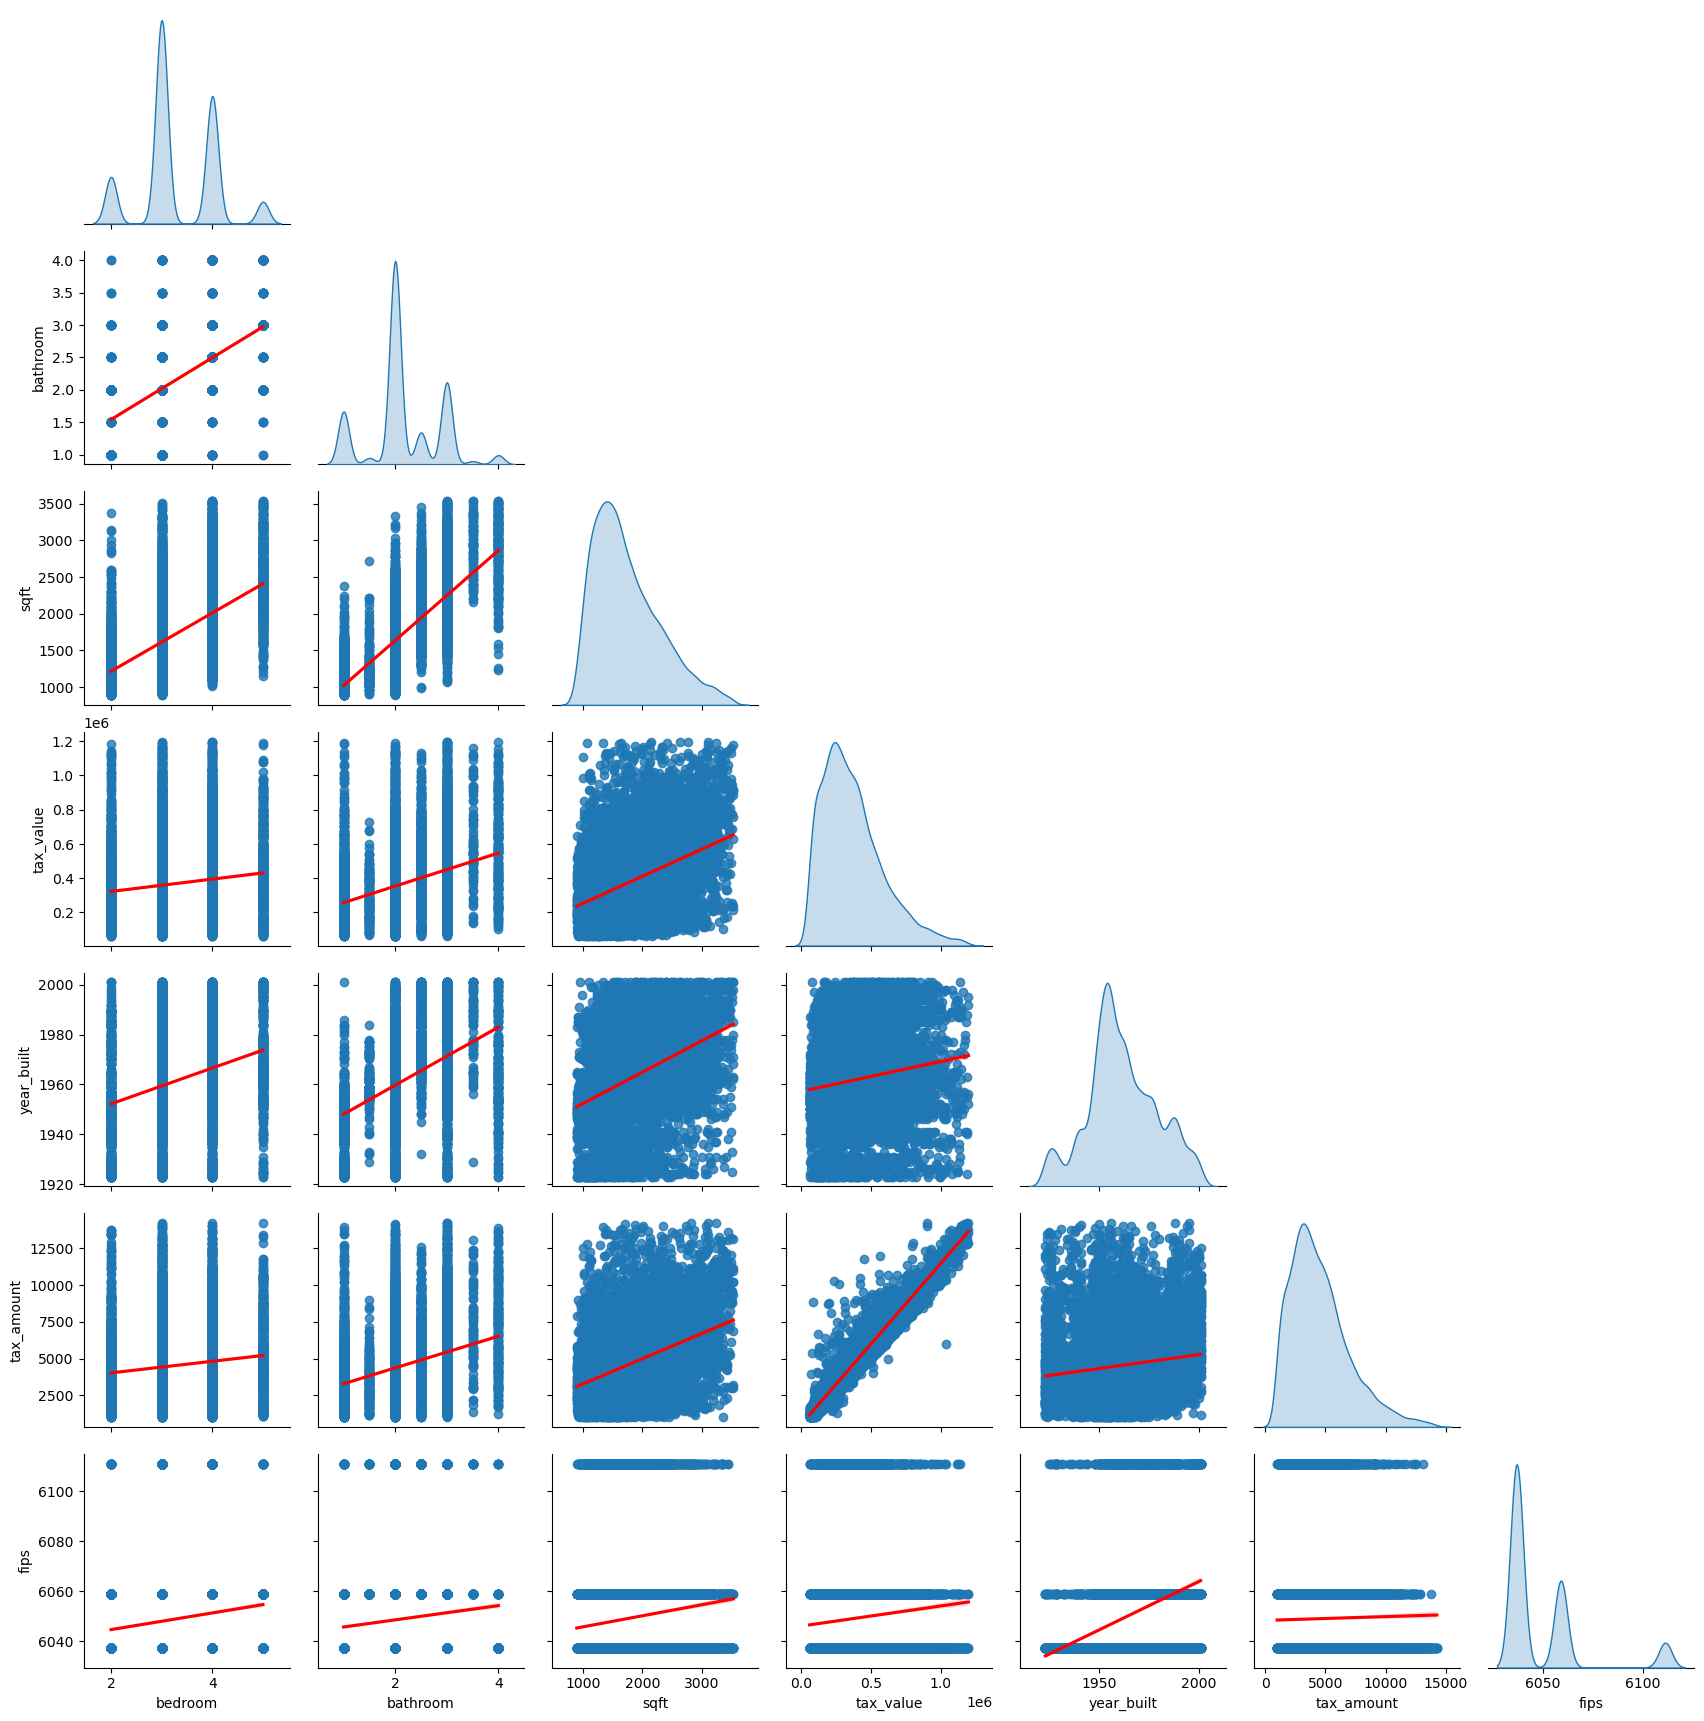

In [5]:
# call a function to make a pairplot graph

plot_variable_pairs(train)

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [6]:
def plot_categorical_and_continuous_vars(df, cont_var, cat_var):
    '''takes a dataframe, a continuous variable, a categorical variable and make 3 graah of categorical
    variables and a continuous vairable'''
    
    plt.figure(figsize = (15,5))
    plt.subplot(131)
    
    #make a box plot graph
    sns.boxplot(x=cat_var, y=cont_var, data=df.sample(10000))
    
    plt.subplot(132)
    # make a violin plot graph
    sns.violinplot(x=cat_var, y=cont_var, data=df.sample(10000))
    
    plt.subplot(133)
    # make a bar plot graph
    sns.barplot(x=cat_var, y=cont_var, data=df.sample(10000))
    plt.show()

    

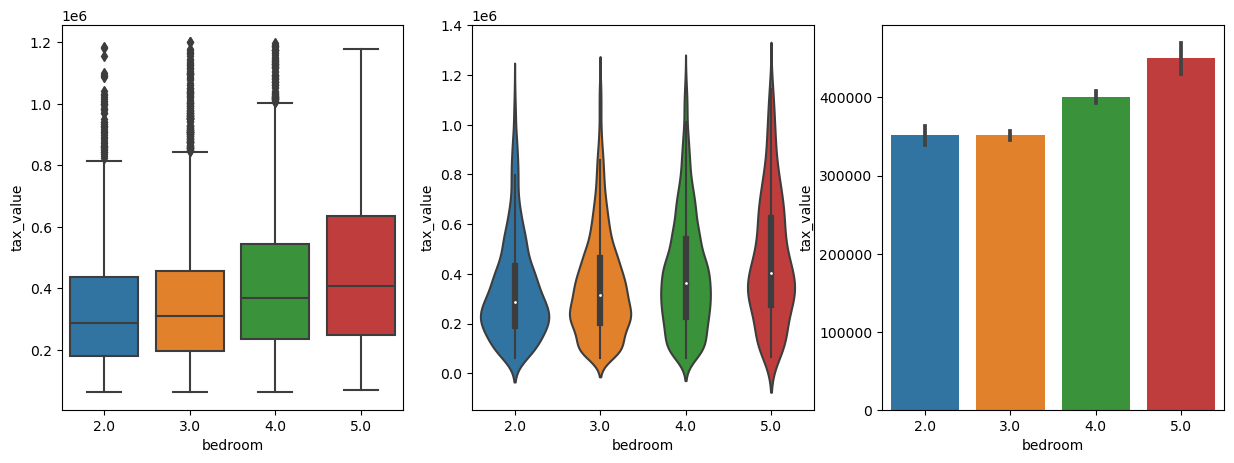

In [7]:
# call a function to create a graph of catergorical varables and continuous variables
plot_categorical_and_continuous_vars(train, 'tax_value', 'bedroom')

#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook

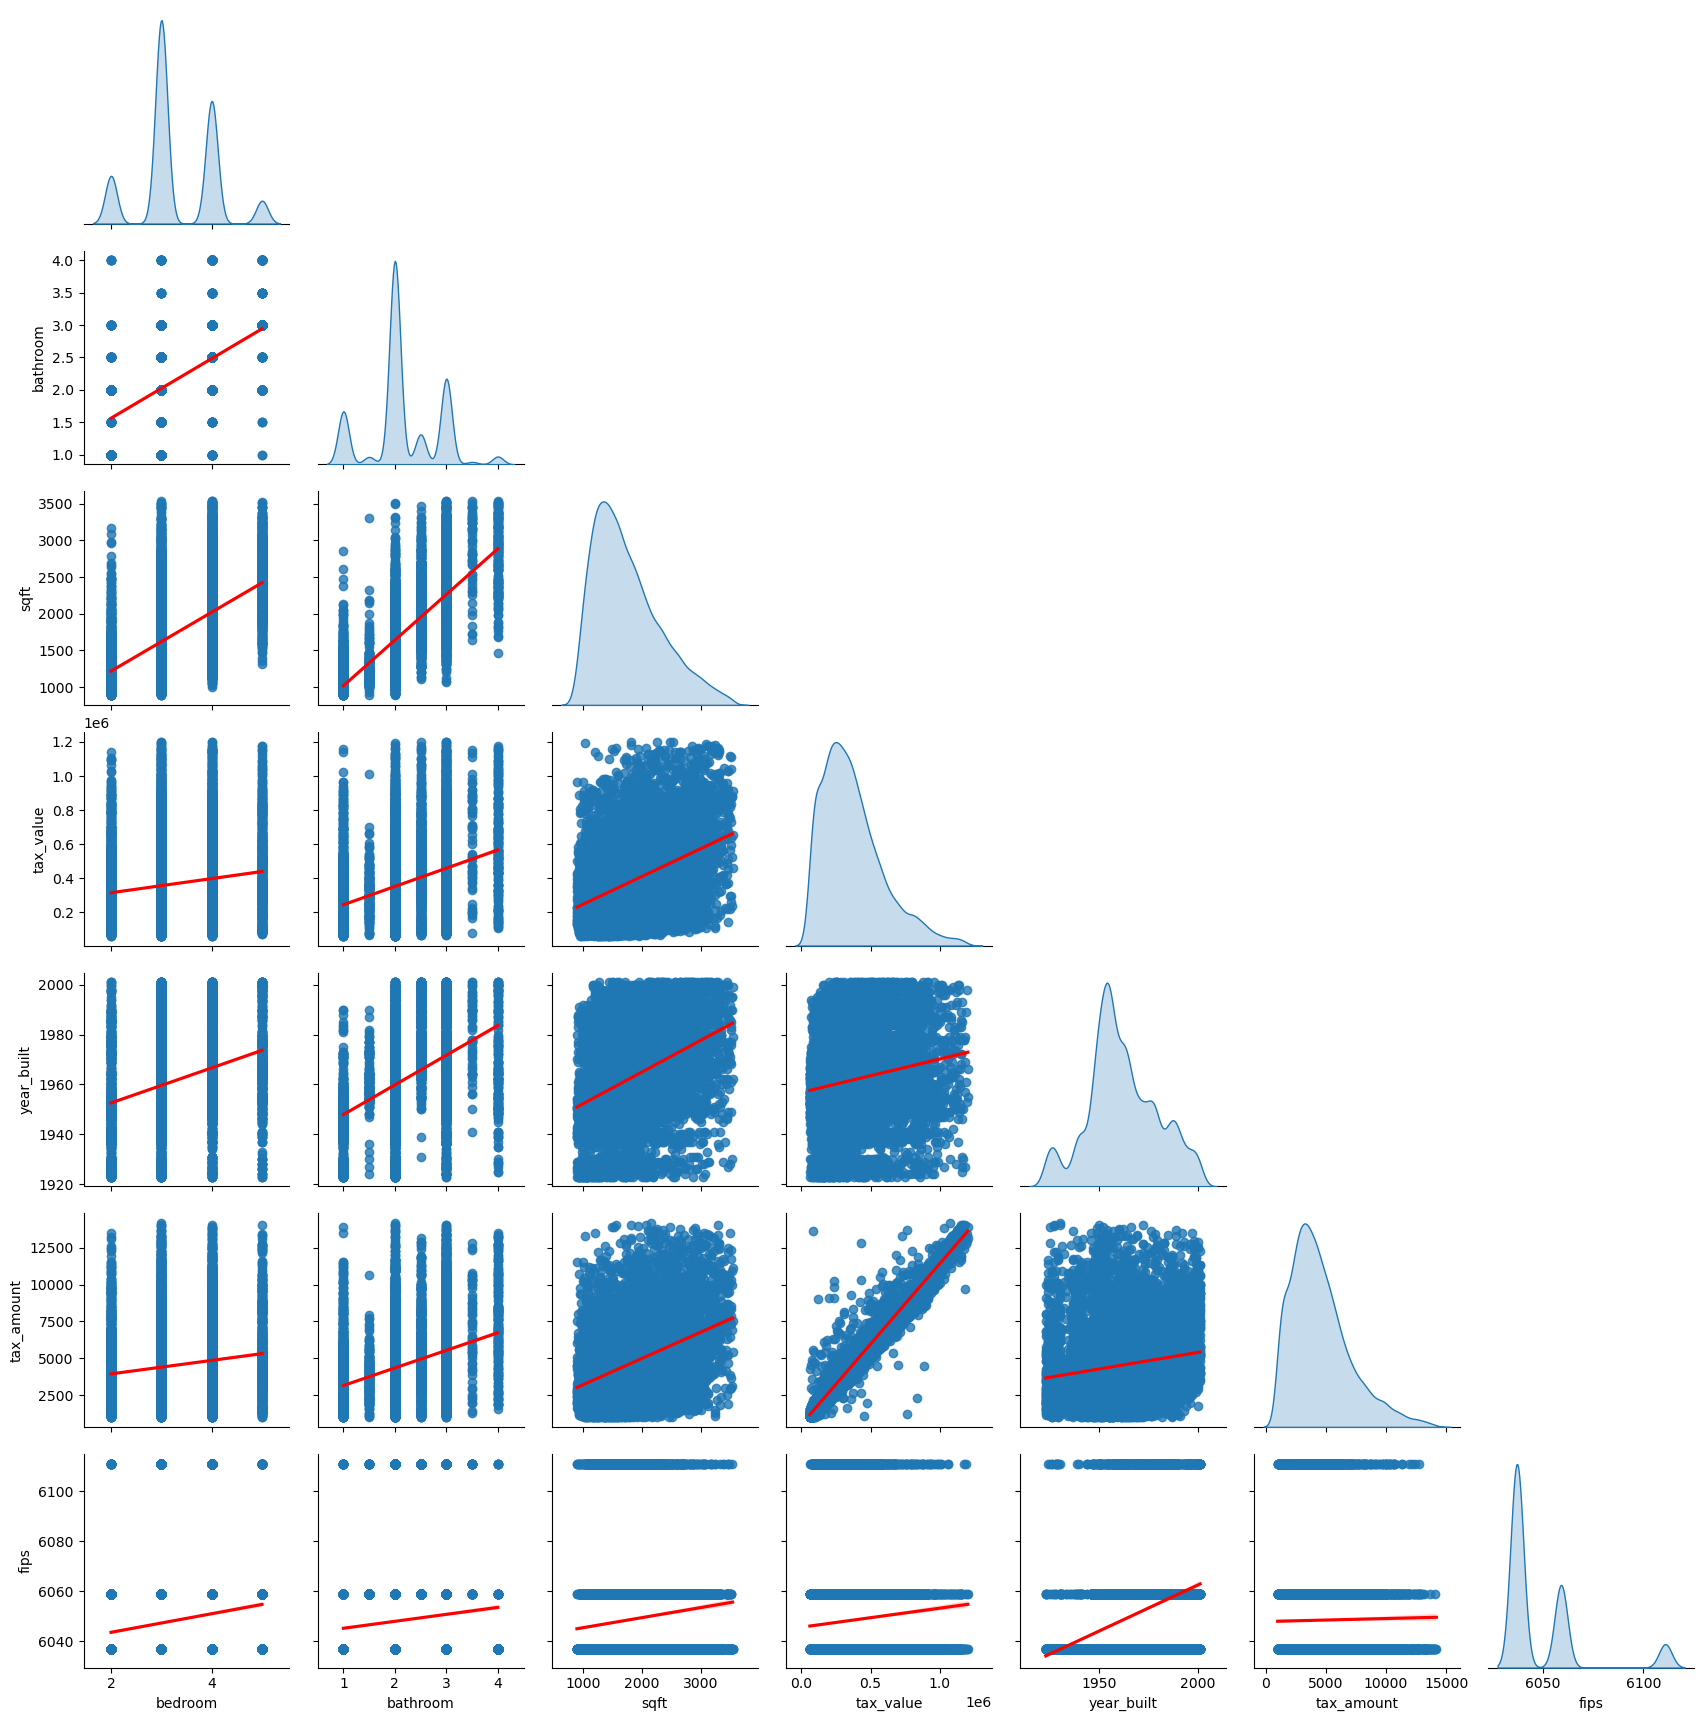

In [8]:
# use a function from explore module to plot pair plot graph
explore.plot_variable_pairs(train)


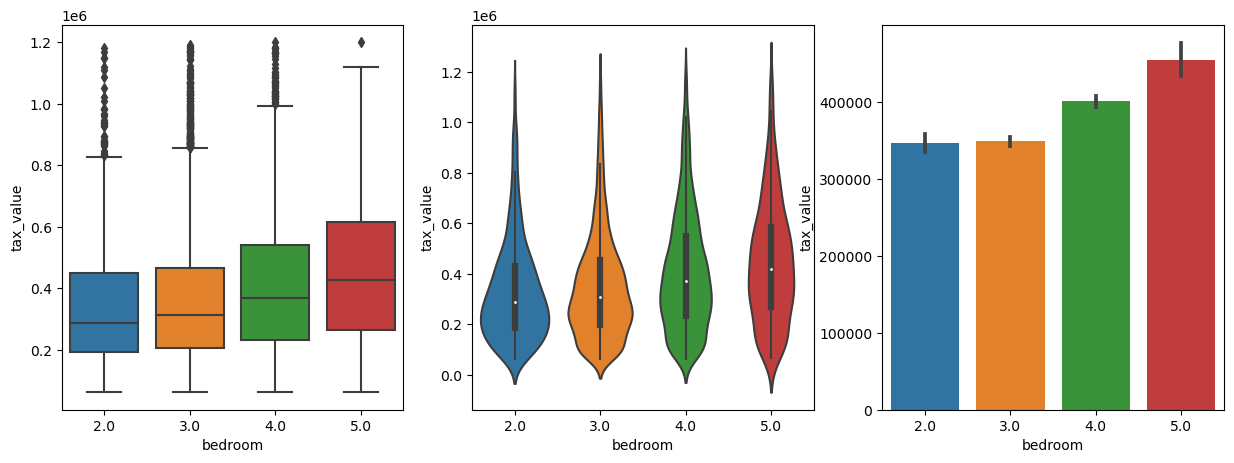

In [9]:
# use a function from explore to plot graphs of discrete variables and continuous variables
explore.plot_categorical_and_continuous_vars(train, 'tax_value', 'bedroom')

#### 7. Come up with some initial hypotheses based on your goal of predicting property value



-  sqft is independent of fips


#### 8.Visualize all combinations of variables in some way.

In [12]:
# create the corelation matrix
train_zillow_corr = train.corr(method='spearman')
train_zillow_corr

,bedroom,bathroom,sqft,tax_value,year_built,tax_amount,fips
bedroom,1.000000,0.518494,0.547355,0.139330,0.342772,0.137033,0.165010
bathroom,0.518494,1.000000,0.757001,0.304256,0.495293,0.297449,0.165506
sqft,0.547355,0.757001,1.000000,0.356680,0.429015,0.345784,0.174129
tax_value,0.139330,0.304256,0.356680,1.000000,0.162785,0.974588,0.144147
year_built,0.342772,0.495293,0.429015,0.162785,1.000000,0.145823,0.423421
tax_amount,0.137033,0.297449,0.345784,0.974588,0.145823,1.000000,0.061464
fips,0.165010,0.165506,0.174129,0.144147,0.423421,0.061464,1.000000


<AxesSubplot:>

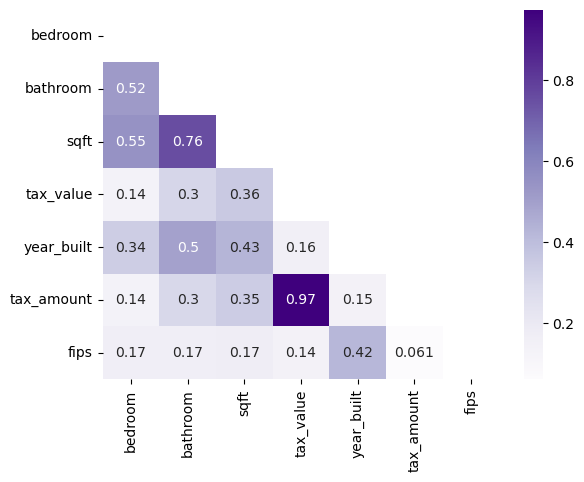

In [13]:
# get heatmap of correlation matrix 
sns.heatmap(train_zillow_corr, cmap='Purples', annot=True, mask= np.triu(train_zillow_corr))

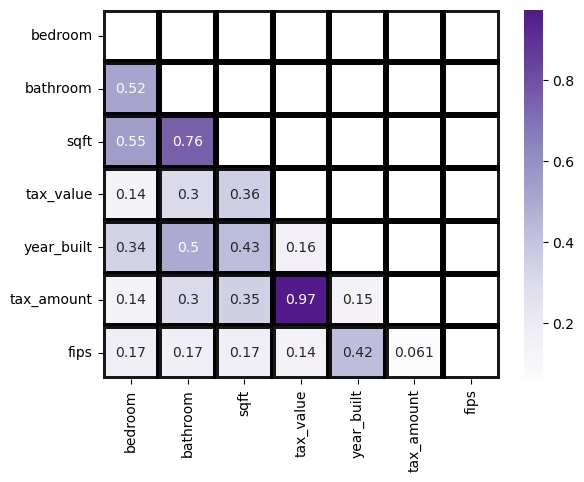

In [14]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}


sns.heatmap(train_zillow_corr, cmap='Purples', annot=True, mask= np.triu(train_zillow_corr), **kwargs)

plt.show()


####  9. Run the appropriate statistical tests where needed

#### sqft is independent of fips
Null Hypothesis: sqft is independent of fips

Alternative Hypothesis: sqft is dependent of fips


In [20]:
import scipy.stats as stats

# set alpha

alpha = 0.05

# create an observed crosstab
observed = pd.crosstab( train.sample(10000).fips,train.sample(10000).sqft)

# run chi squre test
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'P-value: {p}')

if p < alpha:
    print(f'We reject null hypothesis')
    print(f'There exists some relationship between sqft and fips')
else:
    print(f'We fail to reject null hypothesis')
    print(f'There appears to be no significant relationship between sqft and fips')


P-value: 0.2709071911960118
We fail to reject null hypothesis
There appears to be no significant relationship between sqft and fips


#### 10. What independent variables are correlated with the dependent variable, home value?

- sq ft
- tax amount

#### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- bathroom and bedroom : .52
- bathroom and sqft: .76
- bathroom and year_built: .5
- bedroom and sqft : .55
